# Ridge Regression

In [20]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score, train_test_split, cross_validate
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [21]:
X_train = pd.read_csv('X_train.csv', index_col=0)
y_train = pd.read_csv('y_train.csv', index_col=0)
X_test = pd.read_csv('X_test.csv', index_col=0)
y_test = pd.read_csv('y_test.csv', index_col=0)


In [22]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Initialize Linear Regression model
model = Ridge(alpha=0.1)

model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, predictions))
print("Mean Squared Error:", mean_squared_error(y_test, predictions))
print("r2 score:", r2_score(y_test, predictions))

sfs_backward = SFS(model, 
                   k_features=10, 
                   forward=False, 
                   floating=False, 
                   scoring='neg_mean_squared_error',
                   cv=5)

sfs_backward = sfs_backward.fit(X_train, y_train)

# Selected Features
selected_features_backward = X_train.columns[list(sfs_backward.k_feature_idx_)]
print('Selected features in Backward Selection:', selected_features_backward)
print('Score',sfs_backward.k_score_)

pd.DataFrame.from_dict(sfs_backward.get_metric_dict()).T

Mean Absolute Error: 8.833247732899647
Mean Squared Error: 122.87939665412942
r2 score: 0.580100653874534
Selected features in Backward Selection: Index(['PM2.5', 'Land_EQI', 'Sociod_EQI', 'PM10', 'CO', 'Air_EQI', 'Water_EQI',
       'EQI', 'smoking_data', 'UCI_smoking'],
      dtype='object')
Score -136.23122279257436


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
19,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-144.0962441804929, -133.97696325400364, -116...",-137.40837,"(PM2.5, Land_EQI, Sociod_EQI, Built_EQI, CLU50...",16.215733,12.616391,6.308196
18,"(0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14...","[-144.2170836744362, -134.05381940167, -116.18...",-137.093907,"(PM2.5, Land_EQI, Sociod_EQI, Built_EQI, CLU50...",15.557793,12.104491,6.052246
17,"(0, 1, 2, 3, 5, 6, 7, 9, 10, 11, 12, 13, 14, 1...","[-143.75624751454518, -133.99898489399587, -11...",-136.848803,"(PM2.5, Land_EQI, Sociod_EQI, Built_EQI, PM10,...",15.275332,11.884727,5.942363
16,"(0, 1, 2, 3, 5, 7, 9, 10, 11, 12, 13, 14, 15, ...","[-143.6797467769223, -134.01189569804905, -116...",-136.681694,"(PM2.5, Land_EQI, Sociod_EQI, Built_EQI, PM10,...",15.136311,11.776564,5.888282
15,"(0, 1, 2, 3, 5, 9, 10, 11, 12, 13, 14, 15, 16,...","[-143.31442835686494, -133.87286303812235, -11...",-136.492339,"(PM2.5, Land_EQI, Sociod_EQI, Built_EQI, PM10,...",15.000287,11.670733,5.835366
14,"(0, 1, 2, 3, 5, 9, 10, 11, 12, 13, 14, 15, 16,...","[-142.2606489101067, -133.95201693729166, -116...",-136.364198,"(PM2.5, Land_EQI, Sociod_EQI, Built_EQI, PM10,...",14.831125,11.539119,5.769559
13,"(0, 1, 2, 3, 5, 9, 10, 12, 13, 14, 15, 16, 18)","[-142.27082036478737, -133.74386005216965, -11...",-136.266089,"(PM2.5, Land_EQI, Sociod_EQI, Built_EQI, PM10,...",14.855057,11.557739,5.77887
12,"(0, 1, 2, 3, 5, 9, 12, 13, 14, 15, 16, 18)","[-142.31129006285983, -133.83680731567318, -11...",-136.25003,"(PM2.5, Land_EQI, Sociod_EQI, Built_EQI, PM10,...",14.96049,11.639769,5.819885
11,"(0, 1, 2, 3, 5, 9, 13, 14, 15, 16, 18)","[-142.27813927420328, -133.83960847392945, -11...",-136.237573,"(PM2.5, Land_EQI, Sociod_EQI, Built_EQI, PM10,...",14.960686,11.639922,5.819961
10,"(0, 1, 2, 5, 9, 13, 14, 15, 16, 18)","[-142.25302356039498, -133.83355795024247, -11...",-136.231223,"(PM2.5, Land_EQI, Sociod_EQI, PM10, CO, Air_EQ...",14.957381,11.637351,5.818675


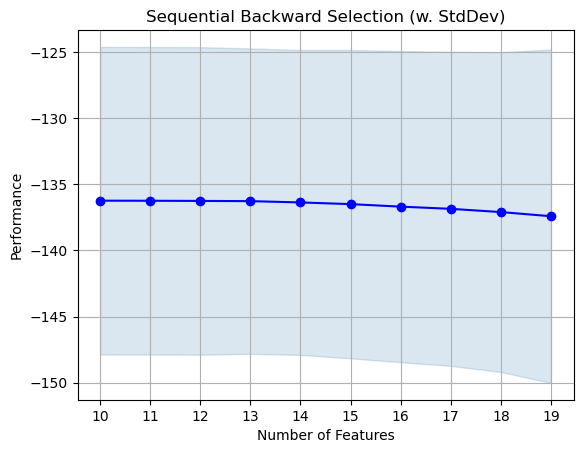

In [23]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig = plot_sfs(sfs_backward.get_metric_dict(), kind='std_dev')
plt.title('Sequential Backward Selection (w. StdDev)')
plt.grid()
plt.show()

In [24]:
from sklearn.model_selection import RepeatedKFold, cross_val_score

X_train = X_train[selected_features_backward]
X_test = X_test[selected_features_backward]

repeatkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=156)

np.mean(cross_val_score(model, X_train, y_train, cv=repeatkf, n_jobs=-1))



0.5495705552630902

In [25]:
# # insert gridsearch here
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': np.logspace(-4, 4, 20)}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# X_test = pd.read_csv('X_test.csv')
# y_test = pd.read_csv('y_test.csv')

# best_model = grid_search.best_estimator_
# test_score = best_model.score(X_test, y_test)
# print("Test set score of the best model:", test_score)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'alpha': 29.763514416313132}
Best score: -136.17439391323012


In [26]:
predictions = grid_search.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, predictions))
print("Mean Squared Error:", mean_squared_error(y_test, predictions))
print("r2 score:", r2_score(y_test, predictions))

Mean Absolute Error: 8.830992128077856
Mean Squared Error: 123.01951827856368
r2 score: 0.5796218349668891
